In [30]:
import numpy as np
import sep
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 10.]

hdu = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data = hdu[0].data

# Fix byte order for SEP
data = data.astype(np.float64)
hdu.close()

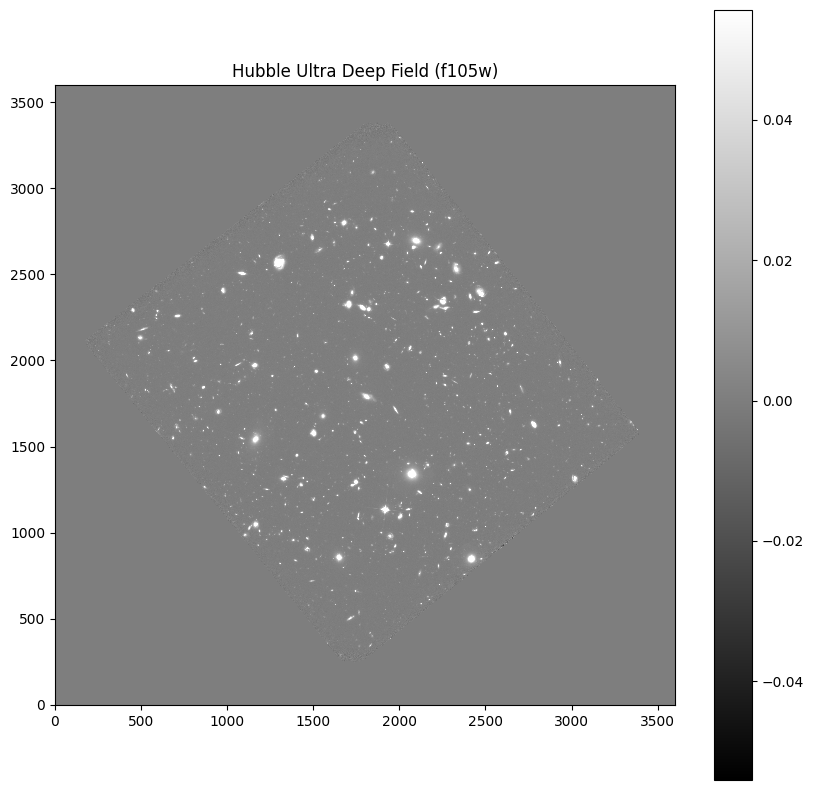

In [31]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title("Hubble Ultra Deep Field (f105w)")
plt.savefig("hudf_raw.png")

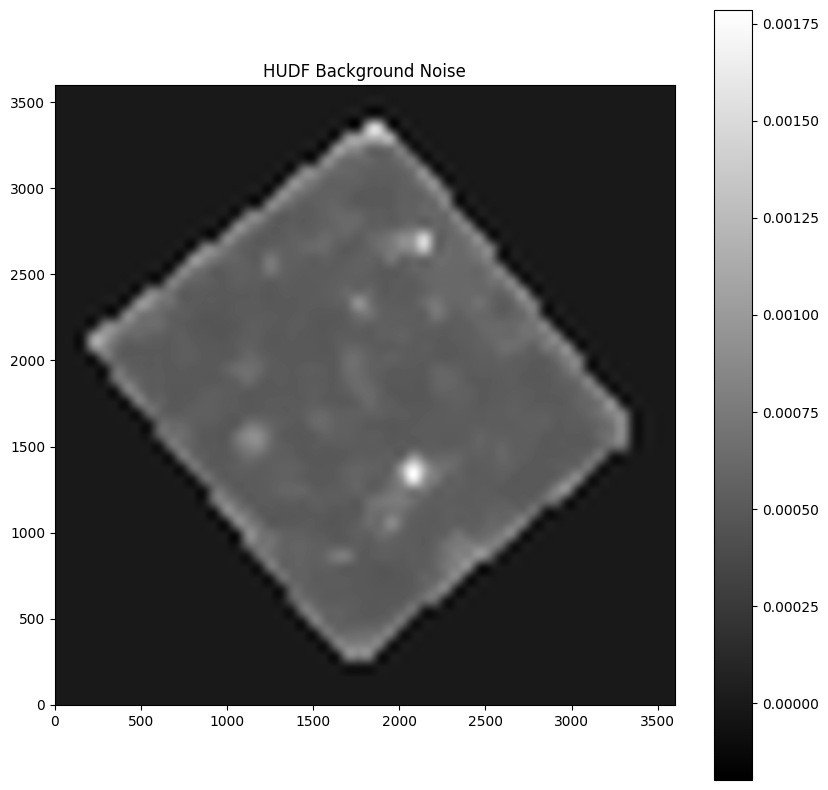

In [32]:
bkg = sep.Background(data)
data_sub = data - bkg

# Displaying background noise (optional, but good for checking)
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("HUDF Background Noise")
plt.savefig("hudf_bkg_noise.png")

In [33]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

print(f"Number of sources detected: {len(objects)}")

Number of sources detected: 8629


In [34]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

# Showoing first 10 results
for i in range(10):
    print(f"object {i}: flux = {flux[i]:.6f} +/- {fluxerr[i]:.6f}")

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


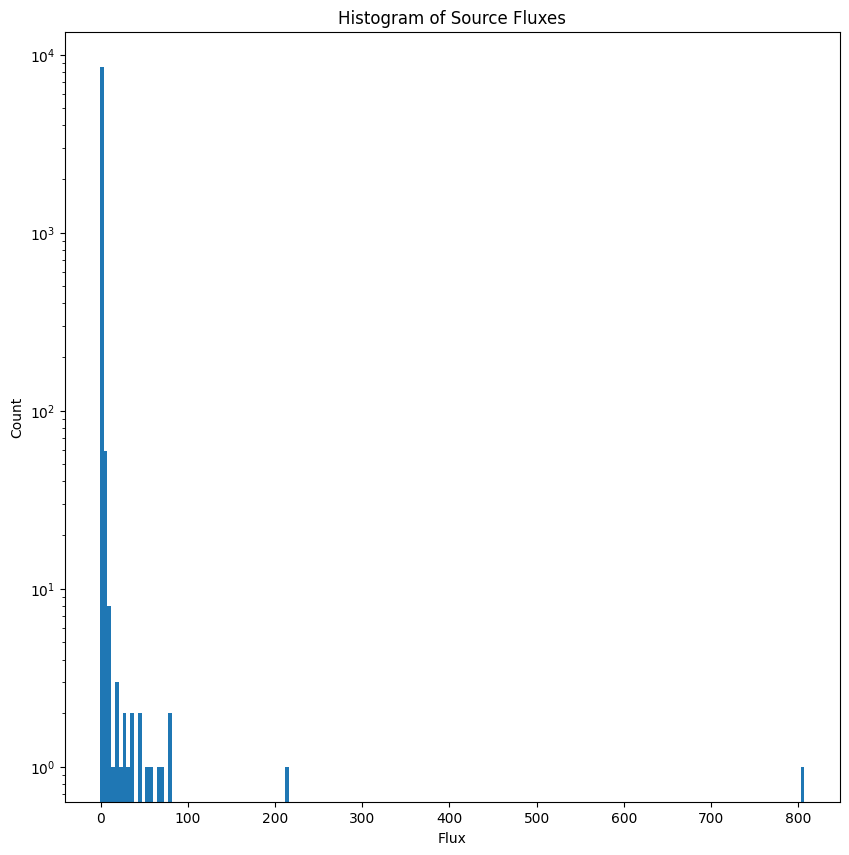

In [35]:
# Creating Histogram of Source FLuxes
plt.hist(flux, bins='auto', log=True) # Using log scale because differences in flux are huge
plt.xlabel('Flux')
plt.ylabel('Count')
plt.title('Histogram of Source Fluxes')
plt.savefig("flux_histogram.png")

Mean Flux: 0.3623
Median Flux: 0.0310
Standard Deviation: 9.2494
Largest Outlier Flux: 807.2973
Outlier is 87.24 standard deviations away from the mean.
Location of outlier: x=1914.25, y=1134.32


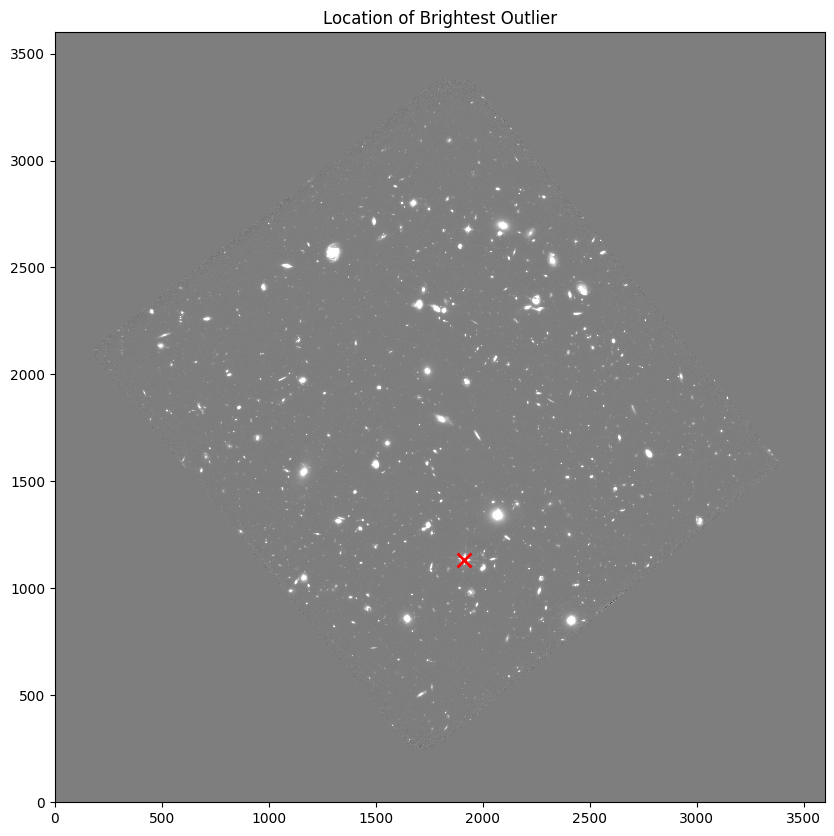

In [36]:
#  Mean, Median, Std Dev
mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_flux = np.std(flux)

print(f"Mean Flux: {mean_flux:.4f}")
print(f"Median Flux: {median_flux:.4f}")
print(f"Standard Deviation: {std_flux:.4f}")

# Largest Outlier
max_flux = np.max(flux)
max_index = np.argmax(flux) # Index of the max value
sigma_dist = (max_flux - mean_flux) / std_flux

print(f"Largest Outlier Flux: {max_flux:.4f}")
print(f"Outlier is {sigma_dist:.2f} standard deviations away from the mean.")

# Location of the Outlier
x_pos = objects['x'][max_index]
y_pos = objects['y'][max_index]

print(f"Location of outlier: x={x_pos:.2f}, y={y_pos:.2f}")

# Visualization of the outlier location
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.plot(x_pos, y_pos, 'rx', markersize=10, markeredgewidth=2) # Red X marks the spot
plt.title("Location of Brightest Outlier")
plt.show()

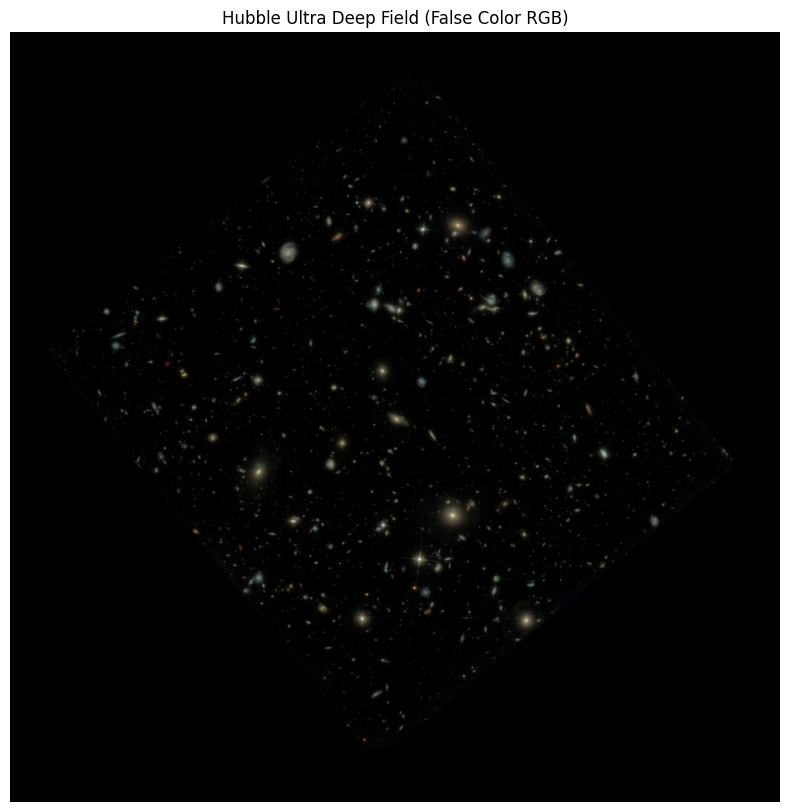

In [37]:

f160w = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")[0].data # Red
f125w = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")[0].data # Green
f105w = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")[0].data # Blue

# 2. Create the RGB image

rgb_image = make_lupton_rgb(f160w, f125w, f105w, Q=10, stretch=0.05)

# 3. Display and Save
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')
plt.title("Hubble Ultra Deep Field (False Color RGB)")
plt.axis('off') 
plt.savefig("hudf_rgb.png")
plt.show()